In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
import itertools

Resumen de las tres técnicas:

Emparejamiento preferencial: En pocas palabras, este emparejamiento toma en cuenta el grado de los nodos a conectar, específicamente, el puntaje entre i y j es grado(i) x grado(j) (si es dirigido, el puntaje es in_grado(i)xout_grado(j) + out_grado(i) x in_grado(j)), esto hace que las conexiones sean más probables para los nodos que ya tienen un grado alto.

Adamic adar: En pocas palabras, este emparejamiento toma en cuenta pares de nodos con vecinos en común (si no tienen, su puntaje es automáticamente 0), pero específicamente cuando estos vecinos tienen un grado pequeño, el puntaje entre i y j es la suma de 1/log(grado(vecinocomun)) para todos los vecinocomun (si es dirigido, el vecino a tomar en cuenta es los que están conectados al nodo, es decir si i está conectado a j, i es vecino de j, pero no necesariamente al revés).

Jaccard: En pocas palabras, este emparejamiento toma en cuenta pares de nodos con vecinos en común, y ya, le da el mismo peso a todos los vecinos (no importa su grado), el puntaje entre i y j es simplemente vecinosencomun/(vecinosdei+vecinosdej) (si es dirigido, se hace lo mismo que con adamic adar)

Nota importante: Los puntajes elegidos para hacer nuevas conexiones son arbitrarios, se eligieron puntajes que dejaran una cantidad reducida de conexiones nuevas, elegir puntajes más altos conectará menos nodos, elegir puntajes más bajos conectará más.

# Grafo Game of Thrones

In [2]:
G = nx.DiGraph()

In [3]:
G.add_node("Loras Tyrell")
G.add_node("Margaery Tyrell")
G.add_node("Cersei Lannister")
G.add_node("Robert Baratheon")
G.add_node("Jaime Lannister")
G.add_node("Tywin Lannister")
G.add_node("Varys")
G.add_node("Ned Stark")
G.add_node("Joffrey Baratheon")
G.add_node("Sandor Clegane")
G.add_node("Olenna Tyrell")
G.add_node("Tyrion Lannister")
G.add_node("Shae")
G.add_node("Ros")
G.add_node("Petyr Baelish")
G.add_node("Sansa Stark")
G.add_node("Lysa Arryn")

In [4]:
G.add_edge("Cersei Lannister", "Loras Tyrell")
G.add_edge("Cersei Lannister", "Margaery Tyrell")
G.add_edge("Cersei Lannister", "Jaime Lannister")
G.add_edge("Cersei Lannister", "Robert Baratheon")
G.add_edge("Cersei Lannister", "Tywin Lannister")
G.add_edge("Cersei Lannister", "Tyrion Lannister")
G.add_edge("Jaime Lannister", "Cersei Lannister")
G.add_edge("Jaime Lannister", "Tywin Lannister")
G.add_edge("Jaime Lannister", "Tyrion Lannister")
G.add_edge("Tyrion Lannister", "Tywin Lannister")
G.add_edge("Tyrion Lannister", "Cersei Lannister")
G.add_edge("Tyrion Lannister", "Jaime Lannister")
G.add_edge("Margaery Tyrell", "Cersei Lannister")
G.add_edge("Robert Baratheon", "Cersei Lannister")
G.add_edge("Tyrion Lannister", "Tywin Lannister")
G.add_edge("Tyrion Lannister", "Cersei Lannister")
G.add_edge("Tywin Lannister", "Jaime Lannister")
G.add_edge("Tywin Lannister", "Tyrion Lannister")
G.add_edge("Tywin Lannister", "Cersei Lannister")
G.add_edge("Varys", "Tyrion Lannister")
G.add_edge("Varys", "Cersei Lannister")
G.add_edge("Varys", "Ned Stark")
G.add_edge("Varys", "Tywin Lannister")
G.add_edge("Varys", "Joffrey Baratheon")
G.add_edge("Varys", "Petyr Baelish")
G.add_edge("Joffrey Baratheon", "Ned Stark")
G.add_edge("Sandor Clegane", "Joffrey Baratheon")
G.add_edge("Olenna Tyrell", "Joffrey Baratheon")
G.add_edge("Petyr Baelish", "Varys")
G.add_edge("Petyr Baelish", "Ned Stark")
G.add_edge("Petyr Baelish", "Ros")
G.add_edge("Petyr Baelish", "Tyrion Lannister")
G.add_edge("Petyr Baelish", "Lysa Arryn")
G.add_edge("Petyr Baelish", "Sansa Stark")
G.add_edge("Petyr Baelish", "Joffrey Baratheon")
G.add_edge("Shae", "Tyrion Lannister")
G.add_edge("Ros", "Petyr Baelish")
G.add_edge("Sansa Stark", "Petyr Baelish")
G.add_edge("Sansa Stark", "Lysa Arryn")

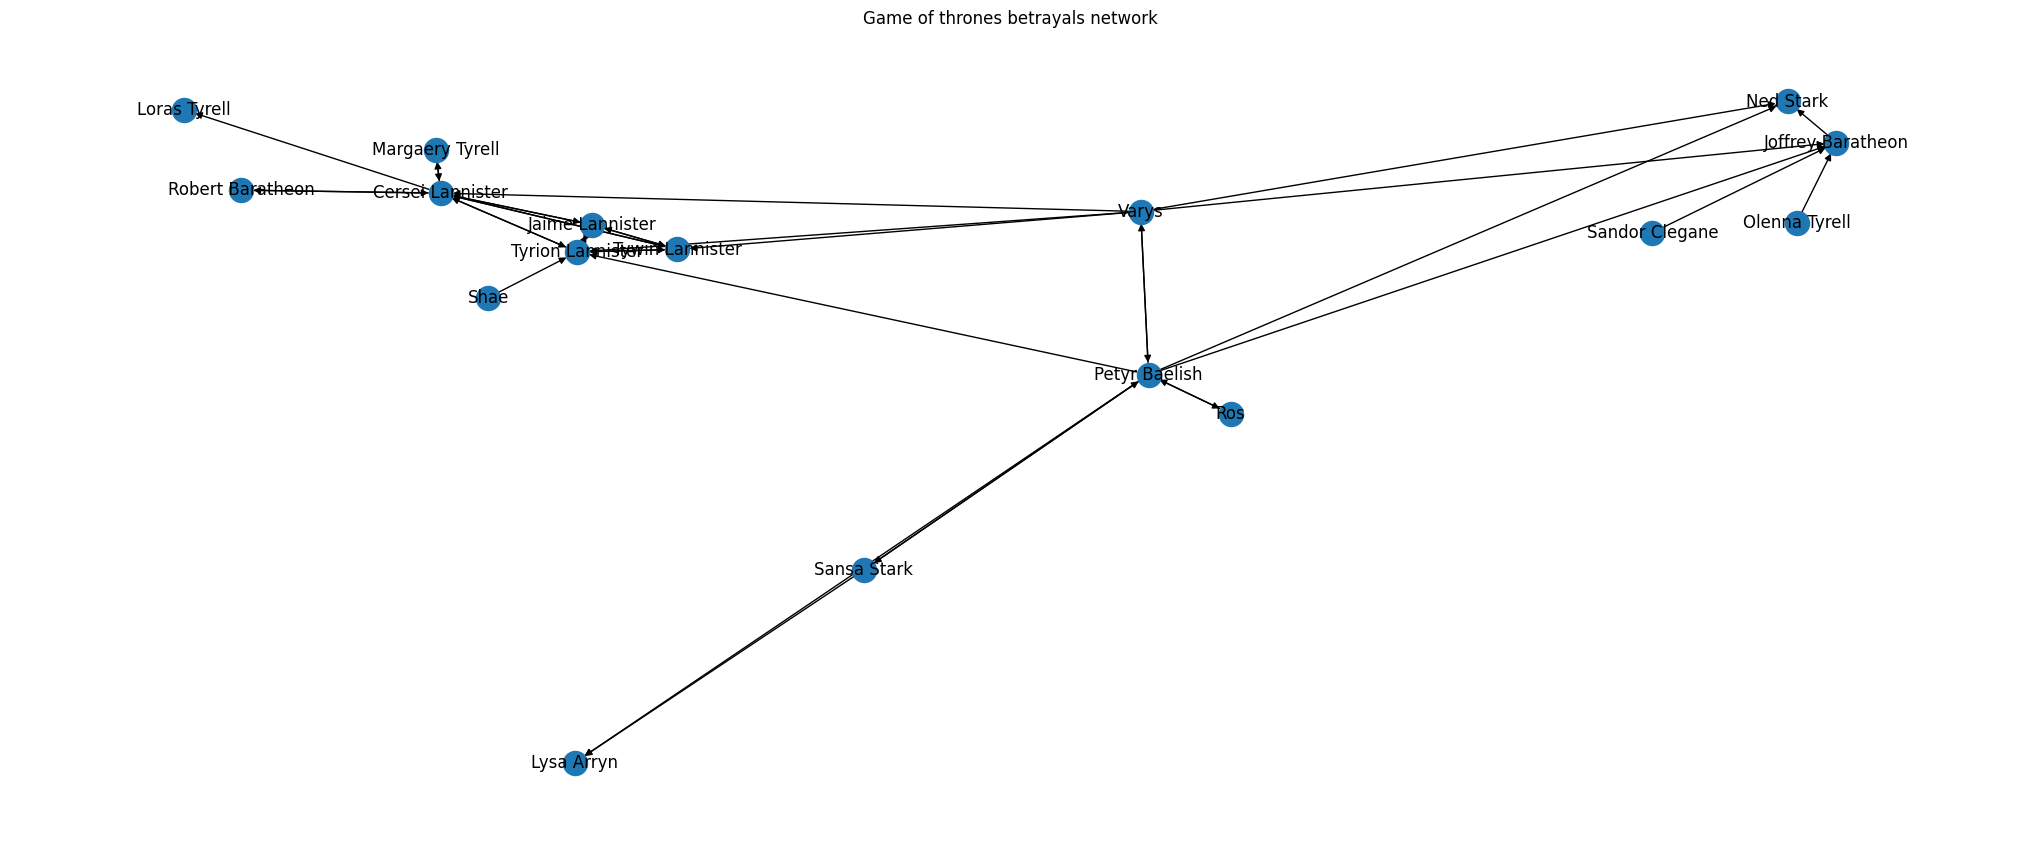

In [5]:
pos = nx.spring_layout(G)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G,pos, with_labels=True)
plt.title("Game of thrones betrayals network")
plt.show()

Los datos son un grafo dirigido en el que los nodos son personajes de la serie Game of Thrones y las aristas son dirigidas indicando si un personaje ha traicionado a otro. 

Hay 17 nodos, para 17 personajes con 39 aristas, o 39 traiciones.

## Emparejamiento preferencial

In [6]:
#Como es un grafo dirigido, creamos la función
def preferential_attachment_directed(graph):
  scores = {}
  for i in graph.nodes():
    for j in graph.nodes():
      if i == j:
        continue
      in_score = graph.in_degree(i)*graph.out_degree(j)
      out_score = graph.out_degree(i)*graph.in_degree(j)
      scores[(i,j)] = in_score + out_score
  return scores

In [7]:
scores = preferential_attachment_directed(G)

In [8]:
G_preferential = G.copy()

In [9]:
#Tomemos un puntaje de 25 como el límite para hacer una nueva conexión
for u, v in scores:
  if scores[(u, v)] > 25:
    if (u,v) not in G.edges():
      print("Es probable que",u,"traicione a",v,"según el emparejamiento preferencial.")
      G_preferential.add_edge(u,v)
#Dejamos solo las nuevas conexiones
G_preferential.remove_edges_from(G.edges())

Es probable que Cersei Lannister traicione a Varys según el emparejamiento preferencial.
Es probable que Cersei Lannister traicione a Joffrey Baratheon según el emparejamiento preferencial.
Es probable que Cersei Lannister traicione a Petyr Baelish según el emparejamiento preferencial.
Es probable que Jaime Lannister traicione a Petyr Baelish según el emparejamiento preferencial.
Es probable que Tywin Lannister traicione a Varys según el emparejamiento preferencial.
Es probable que Tywin Lannister traicione a Petyr Baelish según el emparejamiento preferencial.
Es probable que Joffrey Baratheon traicione a Cersei Lannister según el emparejamiento preferencial.
Es probable que Joffrey Baratheon traicione a Petyr Baelish según el emparejamiento preferencial.
Es probable que Tyrion Lannister traicione a Varys según el emparejamiento preferencial.
Es probable que Tyrion Lannister traicione a Petyr Baelish según el emparejamiento preferencial.
Es probable que Petyr Baelish traicione a Cersei

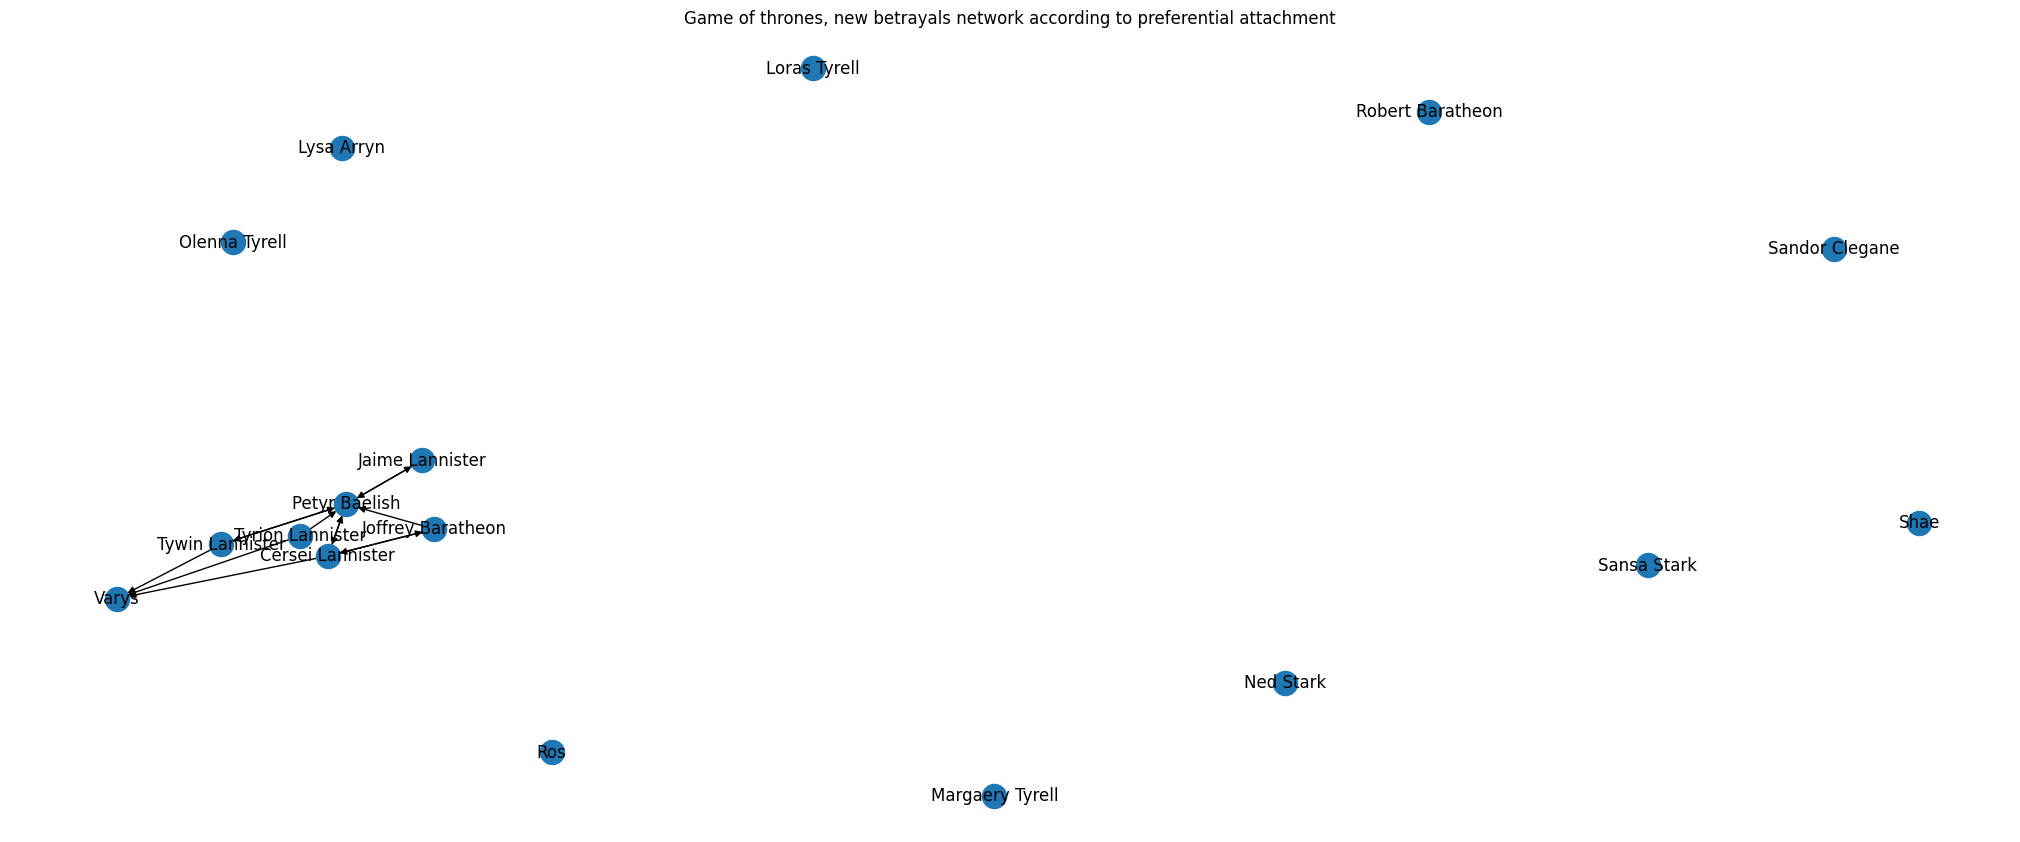

In [10]:
pos = nx.spring_layout(G_preferential)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G_preferential,pos, with_labels=True)
plt.title("Game of thrones, new betrayals network according to preferential attachment")
plt.show()

Esta medida empareja a los lannister con el rey (Joffrey) y las dos personas más "traidoras" de la serie, Varys y Petyr, no hace más conexiones más que con ellos, predice que Petyr va a traicionar a todos en king's landing, lo cual es cierto, ese es precisamente su plan, también predice que Cersei va a traicionar a aún más gente, lo cual tiene sentido, pues es la que más traiciones hace.
Este método hizo buenas predicciones pero no es perfecto, por ejemplo, predice que Tyrion traicionará a Varys aunque esto nunca sucede.

## Adamic-Adar

In [11]:
#Como es un grafo dirigido, creamos la función
def adamic_adar_directed(graph):
  scores = {}
  for i in graph.nodes():
    for j in graph.nodes():
      if i == j:
        continue
      common_neighbors = set(G.predecessors(i)).intersection(G.predecessors(j))
      scores[(i,j)] = sum(1 / math.log(G.out_degree(w)) for w in common_neighbors if G.out_degree(w) > 1)
  return scores

In [12]:
scores = adamic_adar_directed(G)

In [13]:
G_adamic = G.copy()

In [14]:
#Tomemos un puntaje de 0.56 como el límite para hacer una nueva conexión
for u, v in scores:
  if scores[(u, v)] > 0.56:
    if (u,v) not in G.edges():
      print("Es probable que",u,"traicione a",v,"según adamic adar.")
      G_adamic.add_edge(u,v)
#Dejamos solo las nuevas conexiones
G_adamic.remove_edges_from(G.edges())

Es probable que Ned Stark traicione a Joffrey Baratheon según adamic adar.
Es probable que Ned Stark traicione a Tyrion Lannister según adamic adar.
Es probable que Joffrey Baratheon traicione a Tyrion Lannister según adamic adar.
Es probable que Tyrion Lannister traicione a Ned Stark según adamic adar.
Es probable que Tyrion Lannister traicione a Joffrey Baratheon según adamic adar.
Es probable que Lysa Arryn traicione a Petyr Baelish según adamic adar.


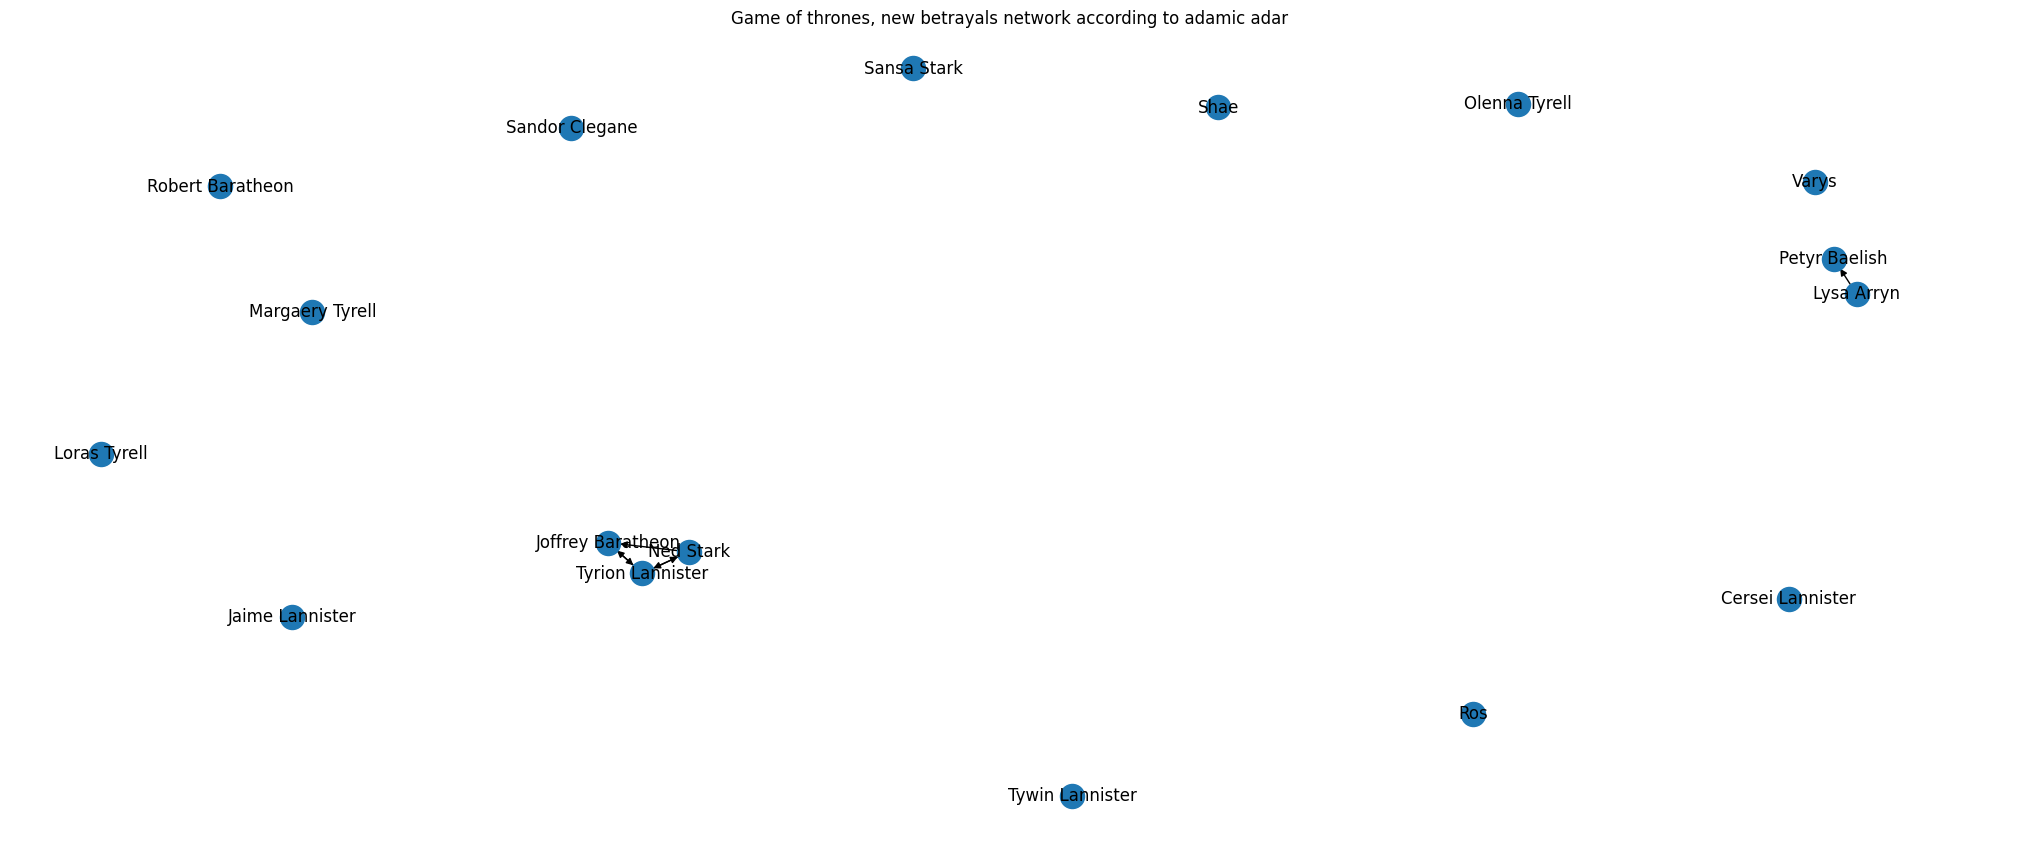

In [15]:
pos = nx.spring_layout(G_adamic)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G_adamic,pos, with_labels=True)
plt.title("Game of thrones, new betrayals network according to adamic adar")
plt.show()

Este método arroja predicciones muy distintas al anterior, predice que Ned Stark traicionará a Tyrion y Joffrey, en cierto modo, Ned sí traiciona a Joffrey puesto que lo denuncia, en general, predice que Ned Tyrion y Joffrey se traicionarán mutuamente, solo que no está la arista (Jofrey,Ned) porque esa está en el grafo original, este método hace conexiones un poco extrañas, lo cual tiene sentido debido a que da más peso a conectar nodos con vecinos comunes pero que sus vecinos tengan grados bajos.

## Jaccard

In [16]:
#Como es un grafo dirigido, creamos la función
def jaccard_coef_directed(graph):
  scores = {}
  for i in G.nodes():
    for j in G.nodes():
      if i == j:
        continue 
      common_neighbors = set(G.predecessors(i)).intersection(G.predecessors(j))
      all_neighbors = set(G.predecessors(i)).union(G.predecessors(j))
      if len(all_neighbors) == 0:
        scores[(i, j)] = 0
      else:
        scores[(i, j)] = len(common_neighbors) / len(all_neighbors)
  return scores

In [17]:
scores = jaccard_coef_directed(G)

In [18]:
G_jaccard = G.copy()

In [19]:
#Tomemos un puntaje de 0.5 como el límite para hacer una nueva conexión
for u, v in scores:
  if scores[(u, v)] > 0.5:
    if (u,v) not in G.edges():
      print("Es probable que",u,"traicione a",v,"según jaccard.")
      G_jaccard.add_edge(u,v)
#Dejamos solo las nuevas conexiones
G_jaccard.remove_edges_from(G.edges())

Es probable que Loras Tyrell traicione a Margaery Tyrell según jaccard.
Es probable que Loras Tyrell traicione a Robert Baratheon según jaccard.
Es probable que Margaery Tyrell traicione a Loras Tyrell según jaccard.
Es probable que Margaery Tyrell traicione a Robert Baratheon según jaccard.
Es probable que Robert Baratheon traicione a Loras Tyrell según jaccard.
Es probable que Robert Baratheon traicione a Margaery Tyrell según jaccard.
Es probable que Varys traicione a Ros según jaccard.
Es probable que Varys traicione a Sansa Stark según jaccard.
Es probable que Ros traicione a Varys según jaccard.
Es probable que Ros traicione a Sansa Stark según jaccard.
Es probable que Sansa Stark traicione a Varys según jaccard.
Es probable que Sansa Stark traicione a Ros según jaccard.


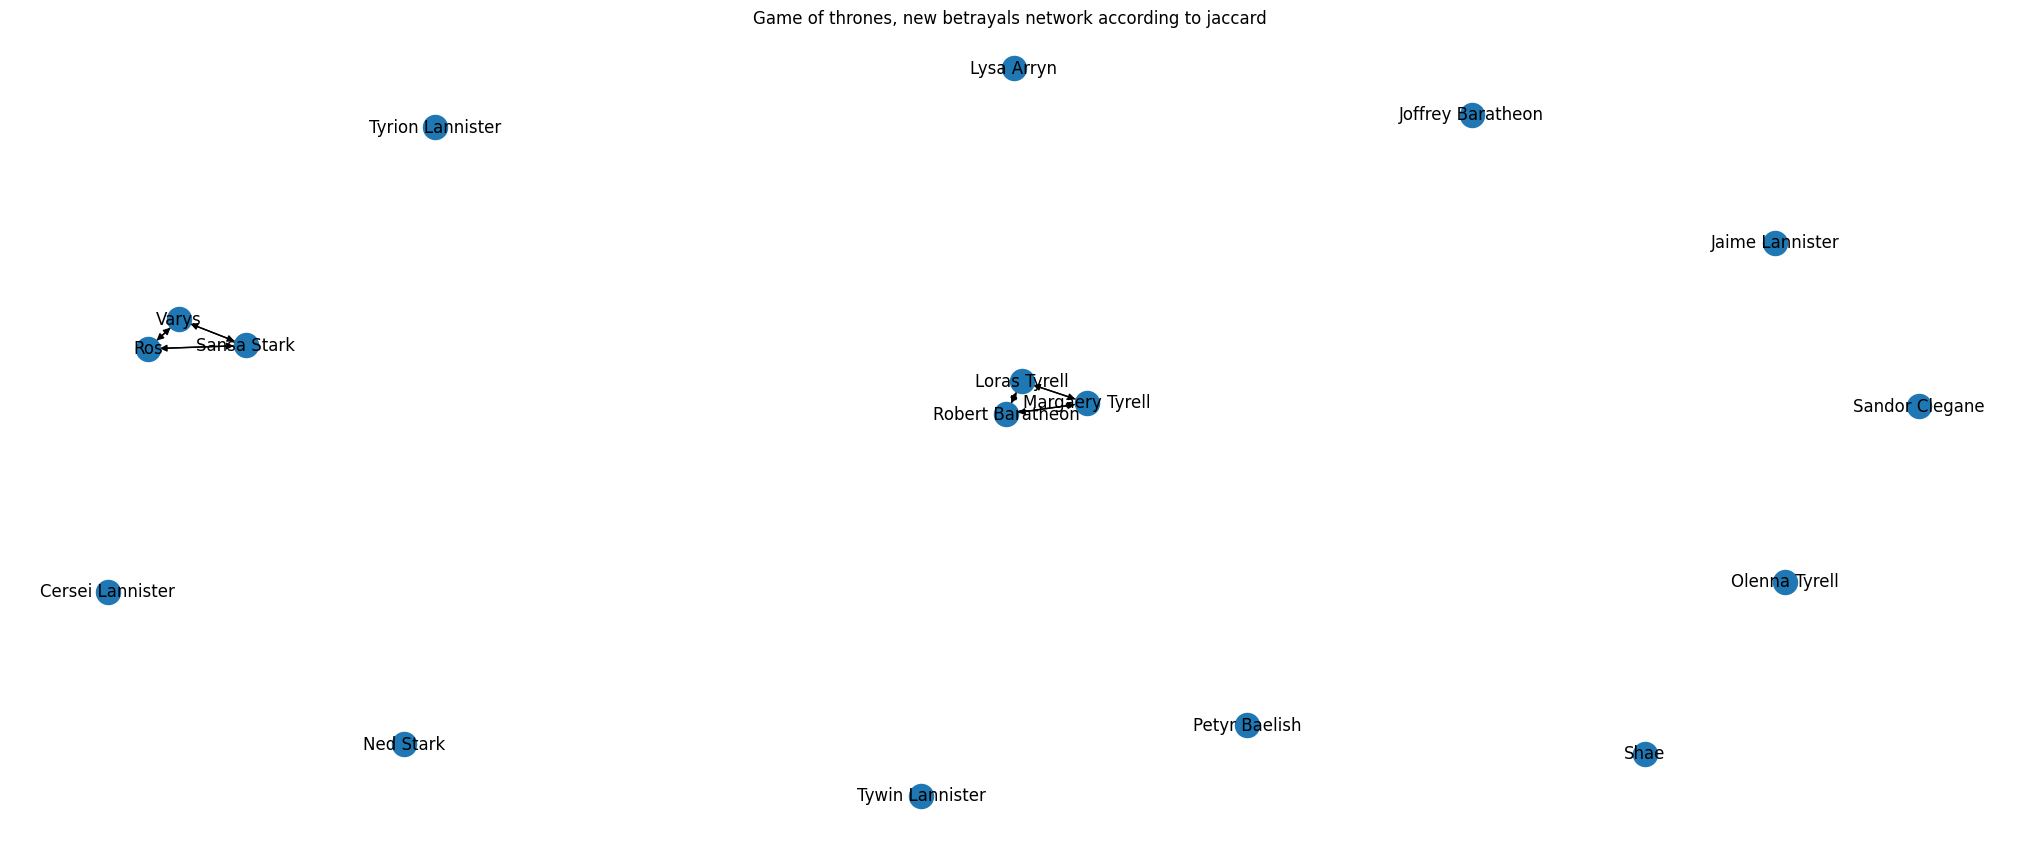

In [20]:
pos = nx.spring_layout(G_jaccard)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G_jaccard,pos, with_labels=True)
plt.title("Game of thrones, new betrayals network according to jaccard")
plt.show()

Esta predicción es aún más extraña que la adamic adar, parece que se crearon dos grupos donde se traicionan todos en ciclo, esto se debe a cómo funciona jaccard, ya que toma en cuenta los vecinos pero a diferencia de adamic adar, no toma en cuenta el grado de los vecinos, así, conecta a aquellos que tienen muchos vecinos en común.
La predicción de los Tyrell con Robert no tiene sentido, los Tyrell nunca se traicionan puesto que son una familia unida, y nunca conviven con Robert en la serie puesto que este muere antes de que lleguen a la ciudad.
La predicción de Varys Ros y Sansa tiene un poco más de sentido (aunque tampoco mucho) ya que Ros y Varys trabajan juntos, pero nunca se traicionan y prácticamente no conviven con Sansa.

# Grafo Karate

In [21]:
G2 = nx.read_gml('karate.gml', label = None)

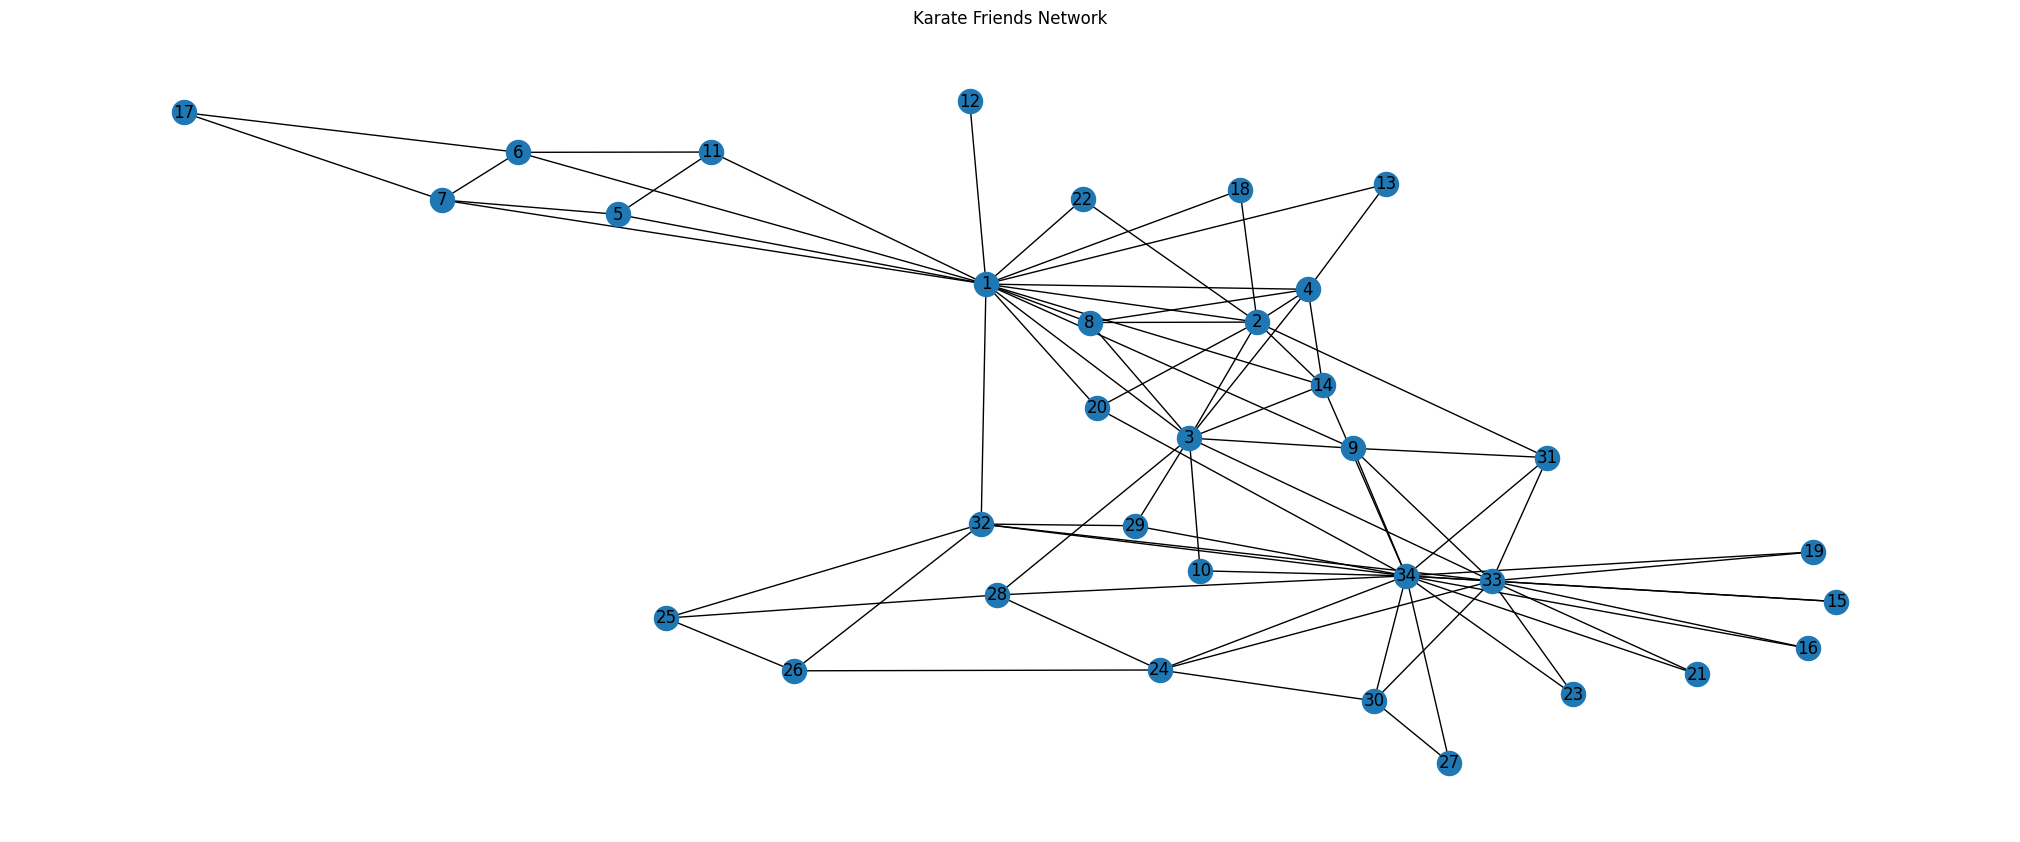

In [22]:
pos = nx.spring_layout(G2)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G2,pos, with_labels=True)
plt.title("Karate Friends Network")
plt.show()

Los datos son un grafo no dirigido en el que los nodos son personas que van a karate y las aristas indican si dos personas son amigas.

Hay 34 nodos, para 34 personas con 78 aristas, o 78 amistades.

## Emparejamiento preferencial

In [23]:
scores = nx.preferential_attachment(G2)

In [24]:
G2_preferential = G2.copy()

In [25]:
#Tomemos un puntaje de 50 como el límite para hacer una nueva conexión
for u, v, p in scores:
  if p > 50:
    if (u,v) not in G2.edges():
      print("Es probable que",u,"se lleve con",v,"según el emparejamiento preferencial.")
      G2_preferential.add_edge(u,v)
#Dejamos solo las nuevas conexiones
G2_preferential.remove_edges_from(G2.edges())

Es probable que 1 se lleve con 33 según el emparejamiento preferencial.
Es probable que 1 se lleve con 34 según el emparejamiento preferencial.
Es probable que 1 se lleve con 24 según el emparejamiento preferencial.
Es probable que 1 se lleve con 28 según el emparejamiento preferencial.
Es probable que 1 se lleve con 30 según el emparejamiento preferencial.
Es probable que 1 se lleve con 31 según el emparejamiento preferencial.
Es probable que 2 se lleve con 32 según el emparejamiento preferencial.
Es probable que 2 se lleve con 33 según el emparejamiento preferencial.
Es probable que 2 se lleve con 34 según el emparejamiento preferencial.
Es probable que 3 se lleve con 32 según el emparejamiento preferencial.
Es probable que 3 se lleve con 34 según el emparejamiento preferencial.
Es probable que 4 se lleve con 33 según el emparejamiento preferencial.
Es probable que 4 se lleve con 34 según el emparejamiento preferencial.
Es probable que 5 se lleve con 34 según el emparejamiento prefer

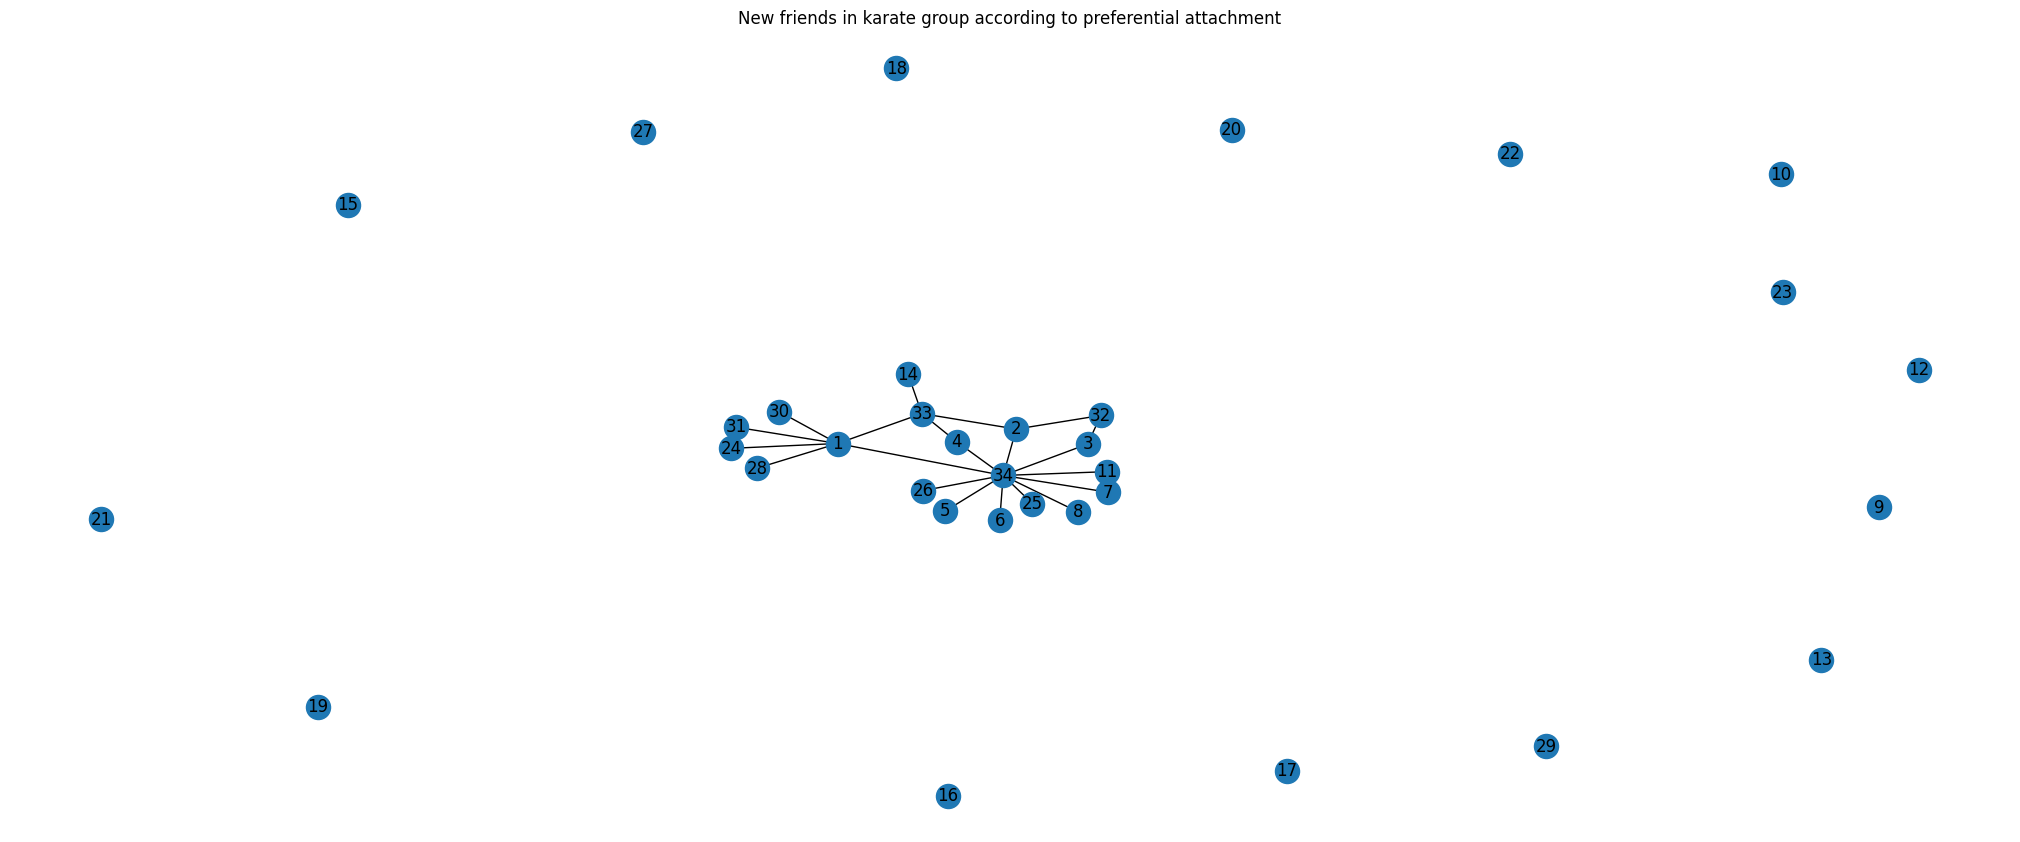

In [26]:
pos = nx.spring_layout(G2_preferential)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G2_preferential,pos, with_labels=True)
plt.title("New friends in karate group according to preferential attachment")
plt.show()

Este emparejamiento crea un nuevo grupo de amigos unido, parece que consiste en personas que ya tienen muchos amigos, como el 1 o el 34.

## Adamic-Adar

In [27]:
scores = nx.adamic_adar_index(G2)

In [28]:
G2_adamic = G2.copy()

In [29]:
#Tomemos un puntaje de 1.0 como el límite para hacer una nueva conexión
for u, v, p in scores:
  if p > 1.0:
    if (u,v) not in G.edges():
      print("Es probable que",u,"se lleve con",v,"según adamic adar.")
      G2_adamic.add_edge(u,v)
#Dejamos solo las nuevas conexiones
G2_adamic.remove_edges_from(G2.edges())

Es probable que 1 se lleve con 33 según adamic adar.
Es probable que 1 se lleve con 34 según adamic adar.
Es probable que 1 se lleve con 17 según adamic adar.
Es probable que 1 se lleve con 31 según adamic adar.
Es probable que 2 se lleve con 9 según adamic adar.
Es probable que 2 se lleve con 33 según adamic adar.
Es probable que 2 se lleve con 34 según adamic adar.
Es probable que 3 se lleve con 24 según adamic adar.
Es probable que 3 se lleve con 31 según adamic adar.
Es probable que 3 se lleve con 32 según adamic adar.
Es probable que 3 se lleve con 34 según adamic adar.
Es probable que 5 se lleve con 6 según adamic adar.
Es probable que 7 se lleve con 11 según adamic adar.
Es probable que 8 se lleve con 14 según adamic adar.
Es probable que 9 se lleve con 14 según adamic adar.
Es probable que 9 se lleve con 32 según adamic adar.
Es probable que 14 se lleve con 20 según adamic adar.
Es probable que 24 se lleve con 32 según adamic adar.
Es probable que 24 se lleve con 25 según adami

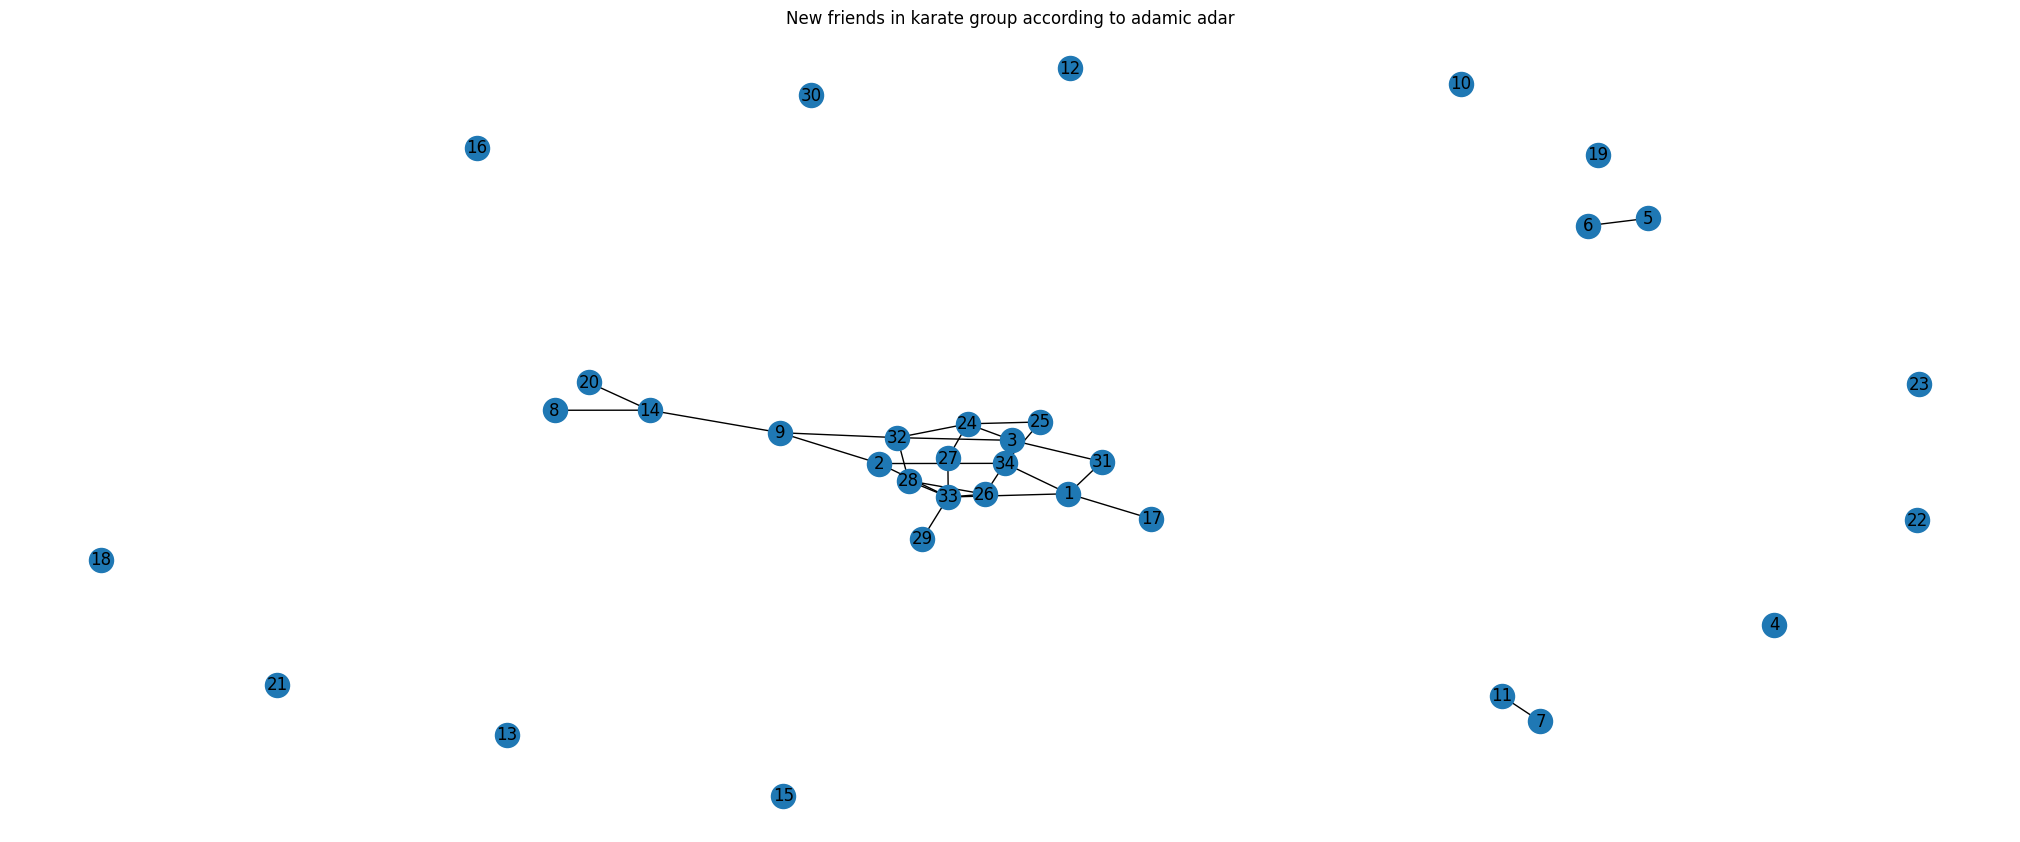

In [30]:
pos = nx.spring_layout(G2_adamic)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G2_adamic,pos, with_labels=True)
plt.title("New friends in karate group according to adamic adar")
plt.show()

A diferencia del otro grafo, este método arroja predicciones similares, también crea un grupo sólido, sin embargo, este método parece ser un poco más complejo, es decir, el anterior parecía conectar un nodo con varios (como el 1 o el 34), debido a que solo toma en cuenta el grado, adamic adar toma en cuenta los vecinos, así que conecta más nodos con más nodos, no solo los que tienen un grado alto, en otras palabras el anterior creaba un grafo donde pocos nodos tenían un grado alto, en este, muchos nodos tienen un grado bajo.

## Jaccard

In [31]:
scores = nx.jaccard_coefficient(G2)

In [32]:
G2_jaccard = G2.copy()

In [33]:
#Tomemos un puntaje de 0.5 como el límite para hacer una nueva conexión
for u, v, p in scores:
  if p > 0.5:
    if (u,v) not in G.edges():
      print("Es probable que",u,"se lleve con",v,"según jaccard.")
      G2_jaccard.add_edge(u,v)
#Dejamos solo las nuevas conexiones
G2_jaccard.remove_edges_from(G2.edges())

Es probable que 5 se lleve con 6 según jaccard.
Es probable que 7 se lleve con 11 según jaccard.
Es probable que 8 se lleve con 14 según jaccard.
Es probable que 10 se lleve con 29 según jaccard.
Es probable que 14 se lleve con 20 según jaccard.
Es probable que 15 se lleve con 16 según jaccard.
Es probable que 15 se lleve con 19 según jaccard.
Es probable que 15 se lleve con 21 según jaccard.
Es probable que 15 se lleve con 23 según jaccard.
Es probable que 16 se lleve con 19 según jaccard.
Es probable que 16 se lleve con 21 según jaccard.
Es probable que 16 se lleve con 23 según jaccard.
Es probable que 18 se lleve con 20 según jaccard.
Es probable que 18 se lleve con 22 según jaccard.
Es probable que 19 se lleve con 21 según jaccard.
Es probable que 19 se lleve con 23 según jaccard.
Es probable que 20 se lleve con 22 según jaccard.
Es probable que 21 se lleve con 23 según jaccard.


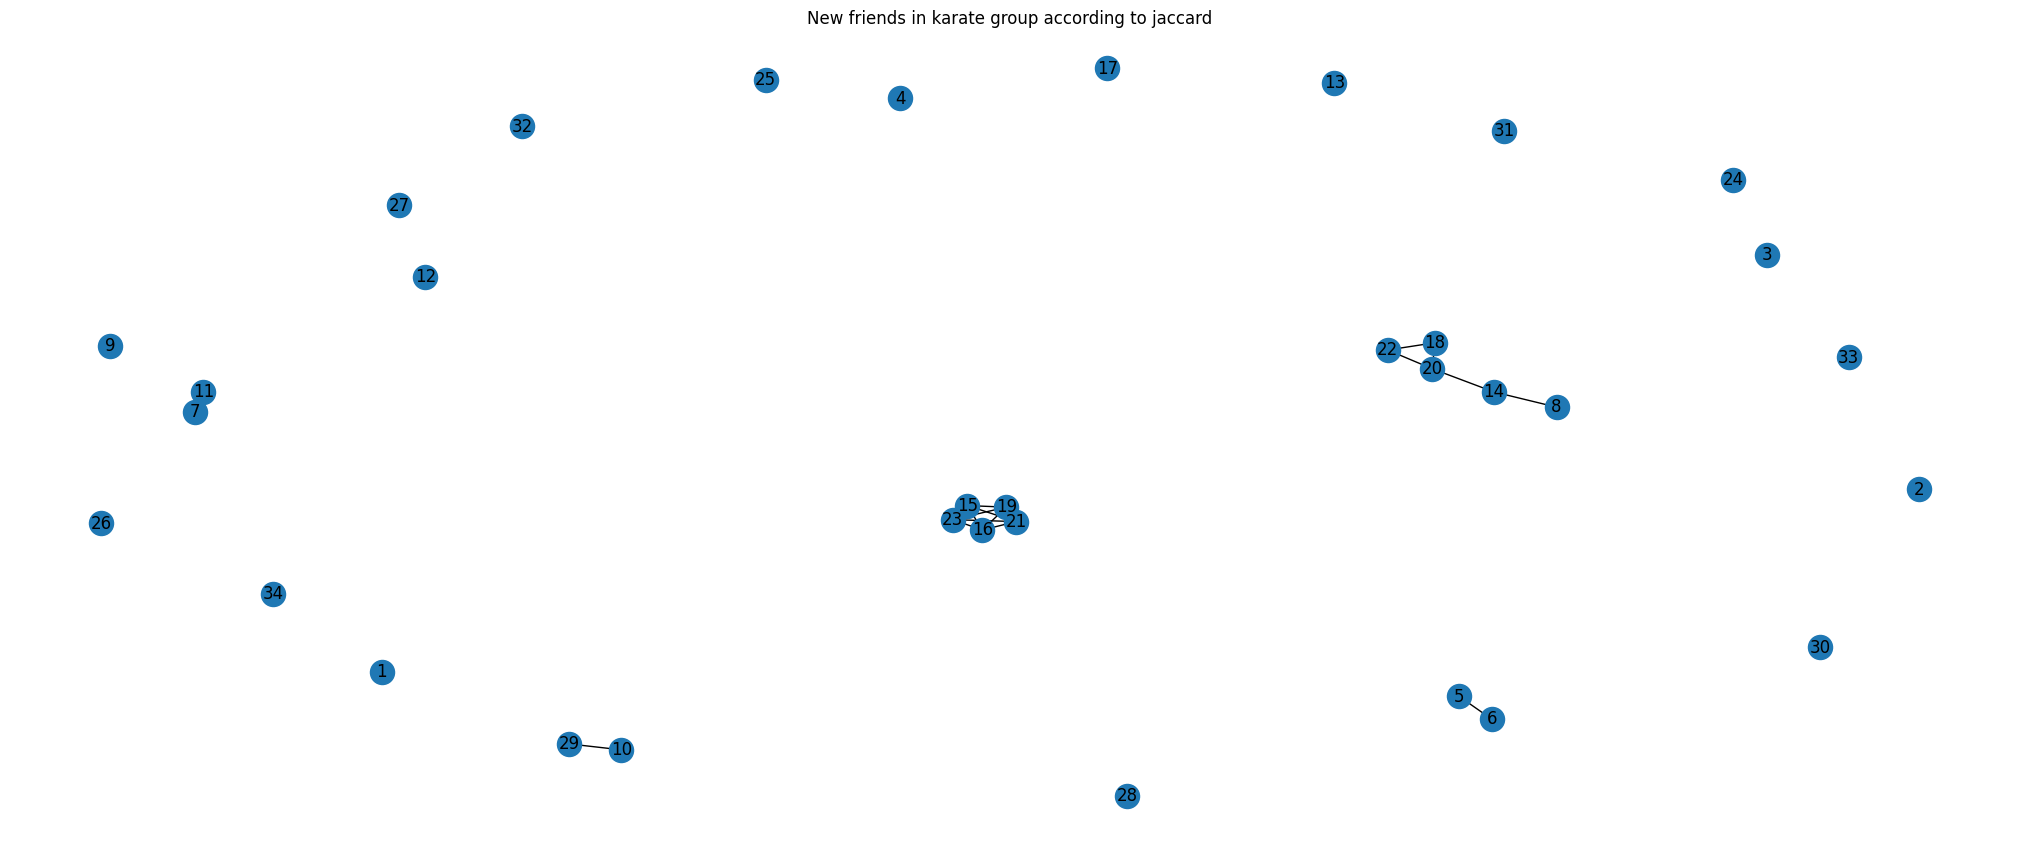

In [34]:
pos = nx.spring_layout(G2_jaccard)
fig = plt.figure(1, figsize=(20,8), dpi=100)
nx.draw(G2_jaccard,pos, with_labels=True)
plt.title("New friends in karate group according to jaccard")
plt.show()

Esta predicción crea varios grupitos nuevos de amigos, a diferencia de los anteriores métodos, los nodos de mayor grado (1,34,33,etc.) no están incluidos en ninguna nueva conexión, esto podría ser debido a que esos nodos tienen vecinos con grado pequeño en el grafo original, pero tienen muchos vecinos, así que paa los incluye por su grado alto, aac por sus vecinos de grado bajo, y jaccard no los toma en cuenta porque sus vecinos no tienen casi conexiones.